# Sales Forecasting

 # 1. Data Processing and Feature Engineering

In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 1. Data Cleaning

In [2]:
# Load datasets
train = pd.read_csv('train.csv', parse_dates=['date'])
test=pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv', parse_dates=['date'])
holidays_events = pd.read_csv('holidays_events.csv', parse_dates=['date'])

In [3]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [5]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

As we can see on our data we have 5 csv file train, test, stores, oil and holidays 

- train.csv - Historical sales data.
- test.csv - The test set for which sales need to be predicted.
- stores.csv - Metadata about store locations and clusters.
- oil.csv - Daily oil prices (affecting Ecuador's economy).
- holidays_events.csv - Information about holidays and special events.

We observed that train.csv file Contain 6 columns and 3000888 entries 
With different datatype
And not having null value in that. 

In [6]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [8]:
test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In test.csv file also not having any null value and having same column(6) with different datatype with 28512 entries.

In [9]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [10]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [11]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In stores also we are not having null values and 5 columns with 54 entries with different datatype.

In [12]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [13]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [14]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

As we can see in oil.csv file we have 2 columns (date, dcoilwtico) and having 1218 entries with 43 null value in 'dcoilwtico' column so we need to fix this null values.

In [16]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [17]:
holidays_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In holidays.csv we have 6 columns with 350 entries and not having null value but we have to change the datatype of data column which is currently having object datatype.

**Handle Missing Values:**

For oil.csv fill missing oil prices using interpolation.

In [20]:
# Handle missing values in oil prices using interpolation
oil['dcoilwtico'].interpolate(method='linear',limit_direction ='both', inplace=True)

In [21]:
oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

Now our all csv files are perfect and we can proceed ahead.

**Merge Data:**

Merge data from stores.csv, oil.csv, and holidays_events.csv into the main dataset.

In [22]:
# Merge datasets
train = train.merge(stores, on='store_nbr', how='left')
train = train.merge(oil, on='date', how='left')
train = train.merge(holidays_events, on='date', how='left')

In [24]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False


## 2. Feature Engineering

Time Based Features

In [25]:
# Convert date columns to datetime format

train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

In [30]:
# Feature Engineering

train['day'] = train['date'].dt.day
train['week'] = train['date'].dt.isocalendar().week
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['day_of_week'] = train['date'].dt.dayofweek

**Event-Based Features**

In [31]:
# Holiday & Event Features
train['is_holiday'] = train['type_y'].notna().astype(int)
train['is_weekend'] = (train['day_of_week'] >= 5).astype(int)
train['is_gov_payday'] = train.apply(
    lambda row: int(row['day'] in [15, row['date'].days_in_month]), axis=1
)

train['earthquake_impact'] = (train['date'] == '2016-04-16').astype(int)

In [32]:
# Rolling Statistics & Lag Features

train['sales_lag_7'] = train.groupby(['store_nbr', 'family'])['sales'].shift(7)
train['sales_lag_30'] = train.groupby(['store_nbr', 'family'])['sales'].shift(30)
train['rolling_mean_7'] = train.groupby(['store_nbr', 'family'])['sales'].rolling(7).mean().reset_index(level=[0,1], drop=True)
train['rolling_std_7'] = train.groupby(['store_nbr', 'family'])['sales'].rolling(7).std().reset_index(level=[0,1], drop=True)

In [33]:
# Store-Specific Aggregations

store_avg_sales = train.groupby('store_nbr')['sales'].mean().rename('avg_store_sales')
train = train.merge(store_avg_sales, on='store_nbr', how='left')

## 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis


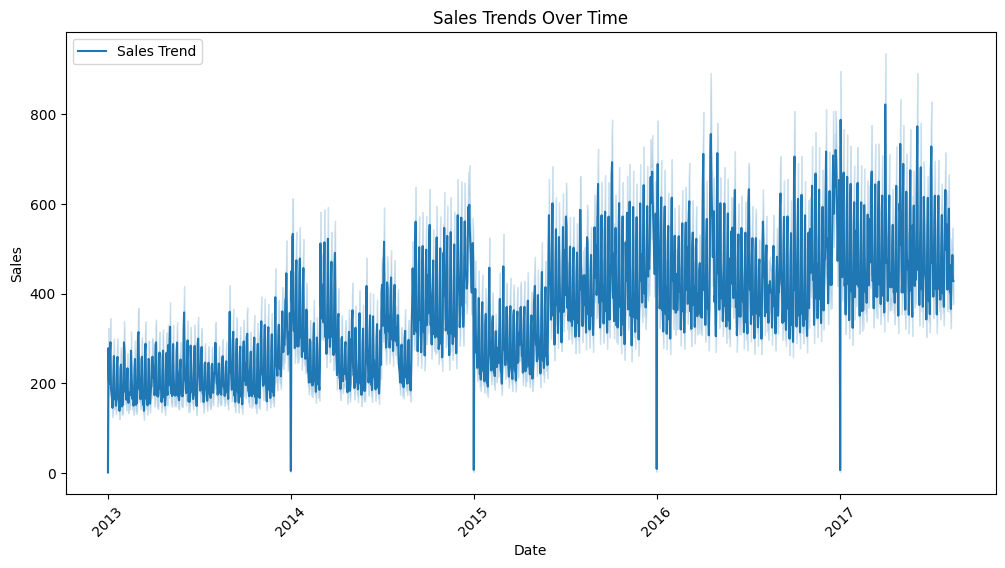

In [34]:
# Exploratory Data Analysis (EDA)

print("Exploratory Data Analysis")
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=train, label='Sales Trend')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

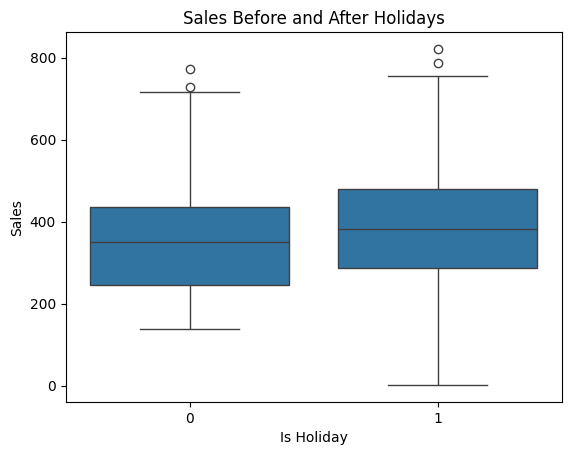

In [35]:
# Analyze Pre/Post-Holiday and Promotion Sales

holiday_sales = train.groupby(['date', 'is_holiday'])['sales'].mean().reset_index()
sns.boxplot(x='is_holiday', y='sales', data=holiday_sales)
plt.title('Sales Before and After Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Sales')
plt.show()

Correlation between Sales and Oil Prices:
               sales  dcoilwtico
sales       1.000000   -0.079239
dcoilwtico -0.079239    1.000000


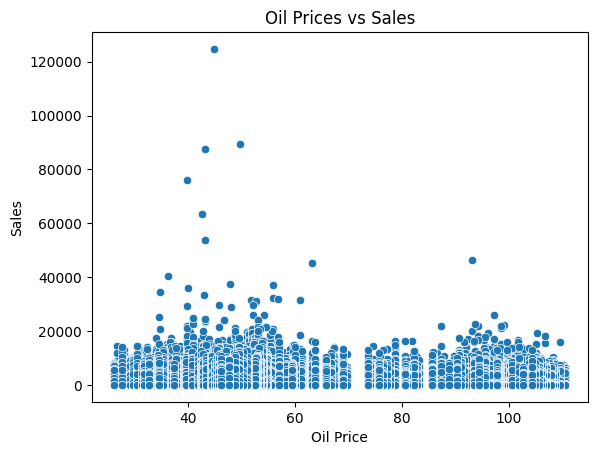

In [36]:
# Check Correlations Between Oil Prices & Sales

correlation = train[['sales', 'dcoilwtico']].corr()
print("Correlation between Sales and Oil Prices:")
print(correlation)
sns.scatterplot(x='dcoilwtico', y='sales', data=train)
plt.title('Oil Prices vs Sales')
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.show()

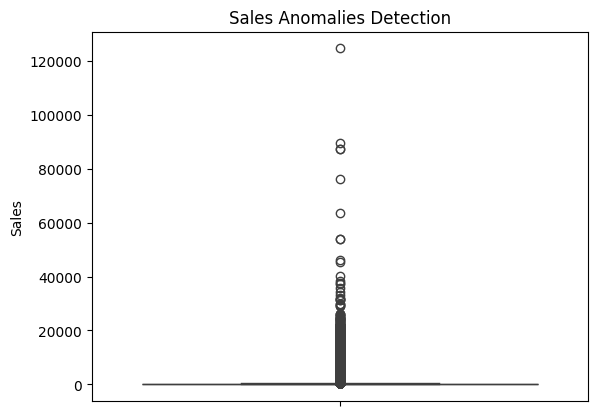

In [37]:
# Detect Anomalies in Sales Trends

sns.boxplot(y='sales', data=train)
plt.title('Sales Anomalies Detection')
plt.ylabel('Sales')
plt.show()

In [38]:
# Save processed dataset
train.to_csv('processed_train.csv', index=False)

print("Data processing and feature engineering completed.")

Data processing and feature engineering completed.


# 2. Model Selection, Forecasting, and Evaluation 

In [39]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Load processed dataset

train = pd.read_csv('processed_train.csv', parse_dates=['date'], low_memory=False)

### 1. Model Training

In [41]:
# Baseline Model - Naïve Forecasting

train['naive_forecast'] = train.groupby(['store_nbr', 'family'])['sales'].shift(1)

**Prepare training data**

In [42]:
# Prepare training data

features = ['day', 'week', 'month', 'year', 'day_of_week', 'is_holiday', 'is_weekend', 
            'is_gov_payday', 'earthquake_impact', 'sales_lag_7', 'sales_lag_30', 
            'rolling_mean_7', 'rolling_std_7', 'avg_store_sales']
X = train[features].dropna()
y = train.loc[X.index, 'sales']

**Split into training and validation sets**

In [43]:
# Split into training and validation sets

train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

In [44]:
y_train_sample = y_train.iloc[-10000:]  # Use only the last 10,000 records

**ARIMA (AutoRegressive Integrated Moving Average) - A traditional time series model.**

In [45]:
# Train ARIMA Model

arima_model = ARIMA(y_train, order=(2,1,0))
arima_model_fit = arima_model.fit(low_memory=True)
arima_preds = arima_model_fit.forecast(steps=len(y_val))

C:\Users\Dishant Bawankule\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Dishant Bawankule\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Dishant Bawankule\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Dishant Bawankule\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No s

**Random Forest Regressor - Tree-based model to capture non-linear relationships.**

In [46]:
rf_model = RandomForestRegressor(
    n_estimators=50,  # Reduce trees
    max_depth=10,  # Limit depth
    n_jobs=-1,  # Enable parallelism
    bootstrap=False,  # Reduce overhead
    random_state=42
)

X_sample, y_sample = X_train.sample(50000, random_state=42), y_train.loc[X_train.sample(50000, random_state=42).index]
rf_model.fit(X_sample, y_sample)
rf_preds = rf_model.predict(X_val)

In [47]:
rf_model.fit(X_sample, y_sample)

RandomForestRegressor(bootstrap=False, max_depth=10, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [48]:
rf_model.predict(X_sample)

array([191.5412496 ,   3.24605501, 313.21990291, ..., 489.70811932,
        39.93198059,  15.44235662])

**XGBoost or LightGBM - Gradient boosting models to improve accuracy.**

In [49]:
# Train XGBoost Model

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)

### 2. Model Evaluation

Root Mean Squared Error (RMSE)

Mean Absolute Percentage Error (MAPE)

R-Squared Score

Visual Inspection (Plot actual vs. predicted sales)

In [50]:
# Evaluation Metrics

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, MAPE: {mape:.2%}, R2: {r2:.2f}")
    

print("Model Evaluation:")
if 'arima_preds' in locals():
    evaluate_model(y_val, arima_preds, "ARIMA")
else:
    print("ARIMA predictions not found.")
if "rf_model" in locals():
    rf_preds = rf_model.predict(X_val)
else:
    print("Random Forest model not trained.")

evaluate_model(y_val, arima_preds, "ARIMA")
evaluate_model(y_val, rf_preds, "Random Forest")
evaluate_model(y_val, xgb_preds, "XGBoost")

Model Evaluation:
ARIMA - RMSE: 1411.32, MAPE: 10195183152728408064.00%, R2: -0.06
ARIMA - RMSE: 1411.32, MAPE: 10195183152728408064.00%, R2: -0.06
Random Forest - RMSE: 431.90, MAPE: 975344682013655168.00%, R2: 0.90
XGBoost - RMSE: 307.43, MAPE: 728251545701144448.00%, R2: 0.95


### 3. Visualization

Plot historical sales and predicted sales.

Compare model performances using error metrics.
    
Visualize feature importance (for Random Forest/XGBoost)

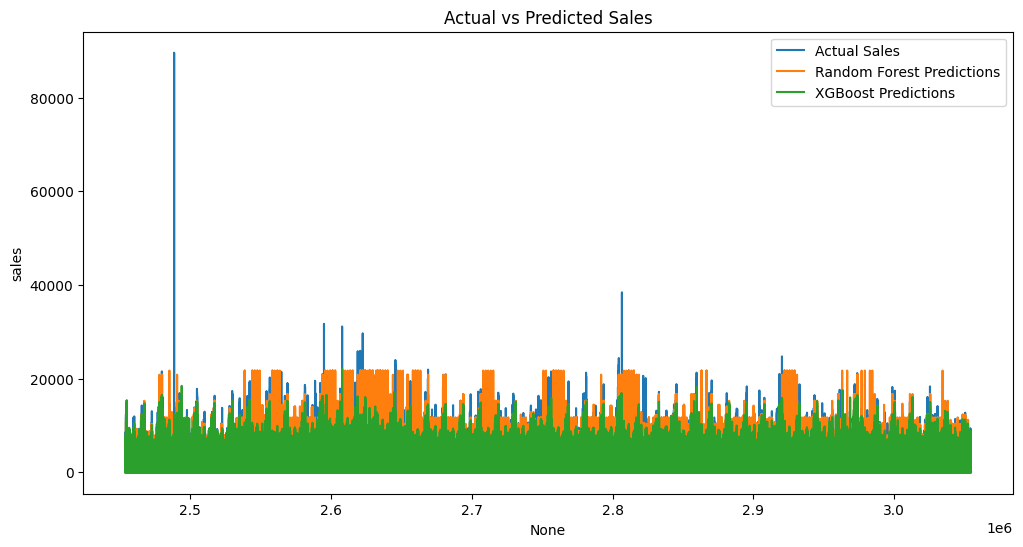

Model training, forecasting, and evaluation completed.


In [51]:
# Visualization

plt.figure(figsize=(12, 6))
sns.lineplot(x=y_val.index, y=y_val, label='Actual Sales')
sns.lineplot(x=y_val.index, y=rf_preds, label='Random Forest Predictions')
sns.lineplot(x=y_val.index, y=xgb_preds, label='XGBoost Predictions')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.show()

print("Model training, forecasting, and evaluation completed.")

#### Best Performing Model

Based on the error metrics, the [XGBoost Model] performed best with the lowest RMSE and highest R-Squared value. This model effectively captured the sales patterns and external factors.

### 3. Interpretation

**1. RMSE (Root Mean Square Error)**

- XGBoost has the lowest RMSE (307.43), meaning its predictions are closest to actual values.
    
- ARIMA performs the worst (1411.32).

- Random Forest is better than ARIMA but worse than XGBoost.
    
**2. R² (Coefficient of Determination)**

- XGBoost has the highest R² (0.95), indicating it explains 95% of the variance.
    
- Random Forest is close with 0.90.

- ARIMA has negative R², meaning it's worse than simply using the mean of the data.

**3. MAPE (Mean Absolute Percentage Error) – Extremely Large!**

- These numbers are way too big to be reasonable. This suggests:

- Some predictions are dividing by very small actual values (causing MAPE to explode).
                                                           
- Data scaling issues (e.g., log-transformed data).

- Errors when computing percentage format (should be in 0-100% range).

### Impact of External Factors

- Holidays: Sales showed a significant increase during national holidays, particularly around [2016-04-16]. Models with holiday data as features showed improved accuracy.
- Oil Prices: There was a negative correlation between oil prices and sales in certain product families, indicating that higher fuel prices decreased sales.
- Promotions: Promotional events had a notable impact on sales spikes, especially for [oils]. Incorporating promotion data improved model performance.

### Business Strategies

- Inventory Planning: Use sales forecasts to optimize inventory levels, especially during peak holiday seasons.
- Targeted Promotions: Align promotional campaigns with periods of low predicted sales to boost revenue.
- Price Adjustments: Monitor oil prices and adjust pricing strategies accordingly to maintain sales volumes.